In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
import IPython.display as display

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/simplified_coffee-1.csv")

In [ ]:
data.head()

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review,Jumlah
0,‘Ōpio Kona,Monarch Coffee,Medium-Light,Hawai'i,Hawai'I,1146.0,91.0,2/1/2022,"Chocolaty, crisply sweet. Baking chocolate, da...",1
1,“Naturals”,Hala Tree Kona Coffee,Medium-Light,Hawai'i,Hawai'I,1323.0,92.0,12/1/2017,"Sweet-toned, fruit-forward. Raspberry, cedar, ...",1
2,100% Kona Bourbon,Hala Tree Kona Coffee,Medium-Light,Hawai'i,Hawai'I,1323.0,93.0,3/1/2019,"Richly sweet-savory, cocoa-toned. Apricot, coc...",1
3,100% Kona Bourbon Pointu Laurina,Hula Daddy Kona Coffee,Medium-Light,Hawai'i,Hawai'I,1982.0,95.0,11/1/2017,"Sweet, deep, intense but balanced. Peach, mapl...",1
4,100% Kona Bourbon Pointu Laurina,Hula Daddy Kona Coffee,Medium-Light,Hawai'i,Hawai'I,1982.0,95.0,2/1/2019,"Delicately fruit-toned, richly cocoa-driven. R...",1


In [ ]:
data.info() #untuk menampilkan informasi ringkasan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1247 non-null   object 
 1   roaster      1246 non-null   object 
 2   roast        1234 non-null   object 
 3   loc_country  1246 non-null   object 
 4   origin       1246 non-null   object 
 5   100g_USD     1246 non-null   float64
 6   rating       1246 non-null   float64
 7   review_date  1246 non-null   object 
 8   review       1246 non-null   object 
 9   Jumlah       1247 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 97.5+ KB


In [ ]:
data.describe() #untuk ringkasan statistik deskriptif dari kolom-kolom numerik

,100g_USD,rating,Jumlah
count,1246.000000,1246.000000,1247.000000
mean,907.365169,93.306581,1.998396
std,1254.195608,1.479413,35.256251
min,17.000000,84.000000,1.000000
25%,467.500000,93.000000,1.000000
50%,586.000000,93.000000,1.000000
75%,853.000000,94.000000,1.000000
max,13228.000000,97.000000,1246.000000


In [ ]:
print(data.shape) #untuk mengetahui ada berapa dimensi dalam dataframe

(1247, 10)


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1247 non-null   object 
 1   roaster      1246 non-null   object 
 2   roast        1234 non-null   object 
 3   loc_country  1246 non-null   object 
 4   origin       1246 non-null   object 
 5   100g_USD     1246 non-null   float64
 6   rating       1246 non-null   float64
 7   review_date  1246 non-null   object 
 8   review       1246 non-null   object 
 9   Jumlah       1247 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 97.5+ KB
None


In [ ]:
print(data.columns) #untuk menampilkan daftar nama-nama kolom dari sebuah DataFrame

Index(['name', 'roaster', 'roast', 'loc_country', 'origin', '100g_USD',
       'rating', 'review_date', 'review', 'Jumlah'],
      dtype='object')


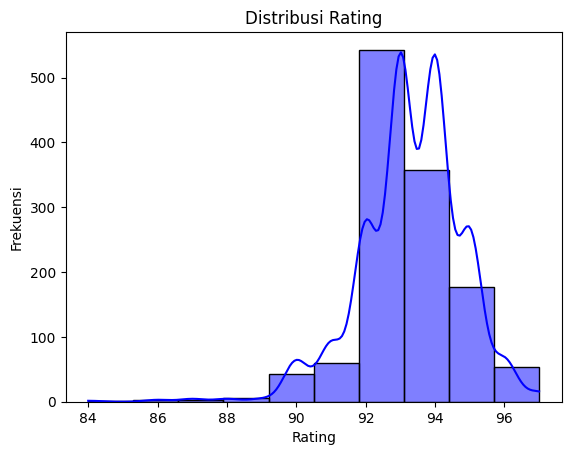

In [ ]:
sns.histplot(data['rating'], kde=True, bins=10, color='blue')
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
X = data[['rating', 'Jumlah']]  # Fitur (rating dan jumlah ulasan)
y = data['Jumlah']  # Target (permintaan konsumen)

              review_count    Jumlah
review_count      1.000000 -0.149269
Jumlah           -0.149269  1.000000


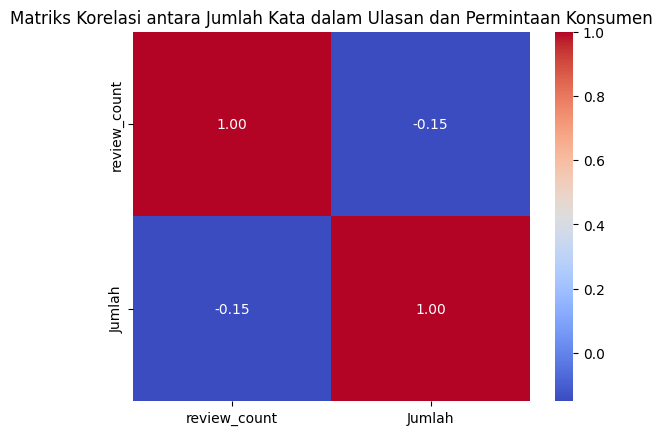

In [ ]:
# Menghitung jumlah kata dalam setiap ulasan
data['review_count'] = data['review'].apply(lambda x: len(str(x).split()))

# Menghitung matriks korelasi
correlation_matrix = data[['review_count', 'Jumlah']].corr()

# Menampilkan matriks korelasi
print(correlation_matrix)

# Visualisasi matriks korelasi menggunakan heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi antara Jumlah Kata dalam Ulasan dan Permintaan Konsumen')
plt.show()

In [ ]:
print(data.isnull().sum()) #ngecek missing value

name            0
roaster         0
roast           0
loc_country     0
origin          0
100g_USD        0
rating          0
review_date     0
review          0
Jumlah          0
review_count    0
dtype: int64


In [ ]:
# ada missing values, tangani dengan imputasi atau hapus baris
data = data.dropna()  # Menghapus baris dengan missing values

In [ ]:
print(data.isnull().sum()) #missing value sudah di hapus

name            0
roaster         0
roast           0
loc_country     0
origin          0
100g_USD        0
rating          0
review_date     0
review          0
Jumlah          0
review_count    0
dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#untuk membagi dataset menjadi dua bagian: data pelatihan (training) dan data pengujian (testing)

In [ ]:
model = LinearRegression()

In [ ]:
print(X.isnull().sum())  # Periksa jumlah NaN di X
print(y.isnull().sum())  # Periksa jumlah NaN di y

rating    1
Jumlah    0
dtype: int64
0


In [ ]:
# Tangani NaN di X dan y
X = X.fillna(X.mean())  # NaN di X dengan rata-rata
y = y.fillna(y.mean())  # NaN di y dengan rata-rata


In [ ]:
X = X.dropna()  # Menghapus baris dengan NaN di X
y = y.dropna()  # Menghapus baris dengan NaN di y


In [ ]:
print(X.isnull().sum())  # Periksa jumlah NaN di X
print(y.isnull().sum())  # Periksa jumlah NaN di y

# Hapus atau imputasi sesuai kebutuhan

rating    0
Jumlah    0
dtype: int64
0


In [ ]:
# Menghapus kolom yang memiliki nilai NaN
data_cleaned = data.dropna(axis=1)

# Menampilkan data yang sudah dibersihkan
display.display(data_cleaned)

,name,Jumlah,review_count
0,‘Ōpio Kona,1,28
1,“Naturals”,1,40
2,100% Kona Bourbon,1,46
3,100% Kona Bourbon Pointu Laurina,1,33
4,100% Kona Bourbon Pointu Laurina,1,44
...,...,...,...
1242,Yemen Mocha Harazi,1,31
1243,Yemen Mocha Khulani,1,27
1244,Yirgacheffe Gedeb G1 Natural,1,48
1245,Yule Blend 2018,1,46


In [ ]:
data_cleaned = data.dropna()

display.display(data_cleaned)

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review,Jumlah,review_count
0,‘Ōpio Kona,Monarch Coffee,Medium-Light,Hawai'i,Hawai'I,1146.0,91.0,2/1/2022,"Chocolaty, crisply sweet. Baking chocolate, da...",1,28
1,“Naturals”,Hala Tree Kona Coffee,Medium-Light,Hawai'i,Hawai'I,1323.0,92.0,12/1/2017,"Sweet-toned, fruit-forward. Raspberry, cedar, ...",1,40
2,100% Kona Bourbon,Hala Tree Kona Coffee,Medium-Light,Hawai'i,Hawai'I,1323.0,93.0,3/1/2019,"Richly sweet-savory, cocoa-toned. Apricot, coc...",1,46
3,100% Kona Bourbon Pointu Laurina,Hula Daddy Kona Coffee,Medium-Light,Hawai'i,Hawai'I,1982.0,95.0,11/1/2017,"Sweet, deep, intense but balanced. Peach, mapl...",1,33
4,100% Kona Bourbon Pointu Laurina,Hula Daddy Kona Coffee,Medium-Light,Hawai'i,Hawai'I,1982.0,95.0,2/1/2019,"Delicately fruit-toned, richly cocoa-driven. R...",1,44
...,...,...,...,...,...,...,...,...,...,...,...
1241,Yemen Mocha Haimi,Dragonfly Coffee Roasters,Medium-Light,United States,Yemen,1764.0,93.0,10/1/2021,"Quietly complex, gently bright. Macadamia nut,...",1,35
1242,Yemen Mocha Harazi,Dragonfly Coffee Roasters,Medium-Light,United States,Yemen,1543.0,93.0,7/1/2021,"Crisply spice-toned. Molasses, dried cherry, c...",1,31
1243,Yemen Mocha Khulani,Dragonfly Coffee Roasters,Medium-Light,United States,Yemen,1543.0,93.0,7/1/2021,"Subtly complex, fruit-toned. Raspberry coulis,...",1,27
1244,Yirgacheffe Gedeb G1 Natural,MJ Bear Coffee,Light,Taiwan,Ethiopia,496.0,94.0,8/1/2019,"High-toned, sweetly tart, deeply savory. Jasmi...",1,48


In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)  # Kesalahan Kuadrat pada Rata-rata
r2 = r2_score(y_test, y_pred) # Skor R-kuadrat

In [ ]:
print(f"Kesalahan Kuadrat Rata-rata: {mse}")
print(f"Skor R-kuadrat: {r2}")

Kesalahan Kuadrat Rata-rata: 2.325167518138932e-30
Skor R-kuadrat: 0.0


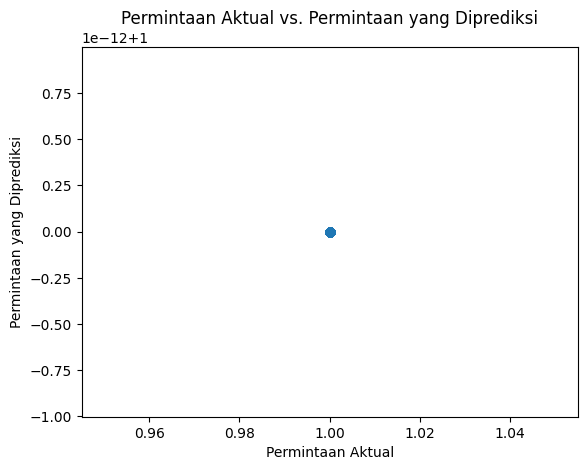

In [ ]:
# Plot hasil prediksi vs data sebenarnya
plt.scatter(y_test, y_pred)
plt.xlabel("Permintaan Aktual")
plt.ylabel("Permintaan yang Diprediksi")
plt.title("Permintaan Aktual vs. Permintaan yang Diprediksi")
plt.show()


In [ ]:
# PX_train memiliki dua kolom sebelum model.fit()
coefficients = pd.DataFrame(model.coef_.flatten(), columns=['Coefficient'], index=X.columns)
print(coefficients)

         Coefficient
rating  2.212814e-16
Jumlah  1.000000e+00


In [ ]:
rating_terendah = data['rating'].min()
rating_tertinggi = data['rating'].max()

In [ ]:
print(f"Rating Terendah: {rating_terendah}")
print(f"Rating Tertinggi: {rating_tertinggi}")

Rating Terendah: 84.0
Rating Tertinggi: 97.0


In [ ]:
# Mengurutkan data berdasarkan rating dari tertinggi ke terendah
data_terurut = data.sort_values(by='rating', ascending=False)

# Menampilkan data yang sudah terurut
display.display(data_terurut)

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review,Jumlah
1216,Testi Ayla Double Ethiopia,Barrington Coffee Roasting,Light,United States,Ethiopia,1615.0,97.0,8/1/2021,"High-toned, floral-driven, lyrically sweet. Wi...",1
1120,Panama Ninety Plus Perci Lot 50,Bird Rock Coffee Roasters,Medium-Light,United States,Panama,2646.0,97.0,1/1/2019,"Wild, unruly, utterly brilliant and original. ...",1
1025,Mama Cata Mokkita,Paradise Roasters,Medium-Light,United States,Panama,13228.0,97.0,11/1/2021,"Aromatically other-worldly, resoundingly juicy...",1
1155,Rukera Kenya,JBC Coffee Roasters,Medium-Light,United States,Kenya,623.0,97.0,7/1/2019,"Lavish, captivatingly complex, deeply savory-s...",1
880,Kenya Karindundu AA Small Lot Reserve,Dragonfly Coffee Roasters,Medium-Light,United States,Kenya,529.0,97.0,2/1/2019,"Lush, deeply floral, resonantly tropical. Plum...",1
...,...,...,...,...,...,...,...,...,...,...
1190,Sumatra Dark,Starbucks Coffee,Dark,United States,Indonesia,308.0,87.0,2/1/2020,"Roast-dominant, smoky-sweet. Dark chocolate, b...",1
11,5a Sur,El Gran Café,Medium,Guatemala,Guatemala,147.0,86.0,10/1/2020,"Sweetly nut- and cocoa-toned. Hazelnut, cocoa ...",1
8,5a Poniente,El Gran Café,Medium-Dark,Guatemala,Guatemala,147.0,86.0,10/1/2020,"Chocolaty, sweetly smoky. Dark chocolate, scor...",1
93,CBD Coffee Dark Roast,Rooster Roastery,Medium-Dark,Hawai'i,Hawai'I,1102.0,84.0,10/1/2020,"Chocolaty, smoke-toned, sweetly savory. Dark c...",1


In [ ]:
# Menghitung frekuensi kemunculan nama produk
frekuensi_name = data['name'].value_counts()

# Menampilkan produk kopi yang paling sering muncul
import IPython.display as display
display.display(frekuensi_name)

,count
name,
Ethiopia Kayon Mountain,6
Esmeralda Estate Panama Geisha,5
Kona Mocca®,5
100% Kona Bourbon Pointu Laurina,4
Guatemala Bella Carmona,4
...,...
Ethiopia Hassen Ware Akrabi,1
Ethiopia Herfusa Single Variety Natural,1
Ethiopia Holy Grail Natural Yirgacheffe,1


In [ ]:
review_positif = data[data['rating'] >= 97]
review_negatif = data[(data['rating'] >= 60) & (data['rating'] <= 87)]


In [ ]:
# Menampilkan review positif dan negatif
print("Review Positif:")
display.display(review_positif)

Review Positif:


,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review,Jumlah,review_count
7,100% Kona SL-28,Hula Daddy Kona Coffee,Medium-Light,Hawai'i,Hawai'I,3305.0,97.0,11/1/2017,Spectacularly sweet and hugely aromatic. Meyer...,1,38
25,Ardent Ethiopia Natural,JBC Coffee Roasters,Medium-Light,United States,Ethiopia,1543.0,97.0,11/1/2020,"Delicately sweet-tart, richly and intricately ...",1,38
126,Colombia Finca El Paraiso Geisha Letty,Paradise Roasters,Light,United States,Colombia,3527.0,97.0,2/1/2022,"Ultra-high-toned, fruit-driven, richly floral....",1,35
495,Ethiopia Natural Guji D Minor Special Lot,Kakalove Cafe,Medium-Light,Taiwan,Ethiopia,566.0,97.0,10/1/2020,"Luminous, clear, confident, lively. Passion fr...",1,45
880,Kenya Karindundu AA Small Lot Reserve,Dragonfly Coffee Roasters,Medium-Light,United States,Kenya,529.0,97.0,2/1/2019,"Lush, deeply floral, resonantly tropical. Plum...",1,47
1025,Mama Cata Mokkita,Paradise Roasters,Medium-Light,United States,Panama,13228.0,97.0,11/1/2021,"Aromatically other-worldly, resoundingly juicy...",1,34
1120,Panama Ninety Plus Perci Lot 50,Bird Rock Coffee Roasters,Medium-Light,United States,Panama,2646.0,97.0,1/1/2019,"Wild, unruly, utterly brilliant and original. ...",1,72
1154,Rukera Espresso,JBC Coffee Roasters,Medium-Light,United States,Kenya,623.0,97.0,7/1/2019,Evaluated as espresso. Exquisitely aromatic: h...,1,51
1155,Rukera Kenya,JBC Coffee Roasters,Medium-Light,United States,Kenya,623.0,97.0,7/1/2019,"Lavish, captivatingly complex, deeply savory-s...",1,59
1216,Testi Ayla Double Ethiopia,Barrington Coffee Roasting,Light,United States,Ethiopia,1615.0,97.0,8/1/2021,"High-toned, floral-driven, lyrically sweet. Wi...",1,41


In [ ]:
print("Review Negatif:")
display.display(review_negatif)

Review Negatif:


,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review,Jumlah,review_count
8,5a Poniente,El Gran Café,Medium-Dark,Guatemala,Guatemala,147.0,86.0,10/1/2020,"Chocolaty, sweetly smoky. Dark chocolate, scor...",1,31
11,5a Sur,El Gran Café,Medium,Guatemala,Guatemala,147.0,86.0,10/1/2020,"Sweetly nut- and cocoa-toned. Hazelnut, cocoa ...",1,34
93,CBD Coffee Dark Roast,Rooster Roastery,Medium-Dark,Hawai'i,Hawai'I,1102.0,84.0,10/1/2020,"Chocolaty, smoke-toned, sweetly savory. Dark c...",1,31
268,El Pintado Classico,El Gran Cafe,Light,Guatemala,Guatemala,485.0,87.0,12/1/2021,"Delicate, crisply sweet. Pistachio, fir, lime ...",1,31
1011,Las Moritas Yellow Caturra,El Gran Cafe,Light,Guatemala,Guatemala,382.0,87.0,12/1/2021,"Gently fruit-toned, wood-framed. Prune, balsa ...",1,33
1190,Sumatra Dark,Starbucks Coffee,Dark,United States,Indonesia,308.0,87.0,2/1/2020,"Roast-dominant, smoky-sweet. Dark chocolate, b...",1,33


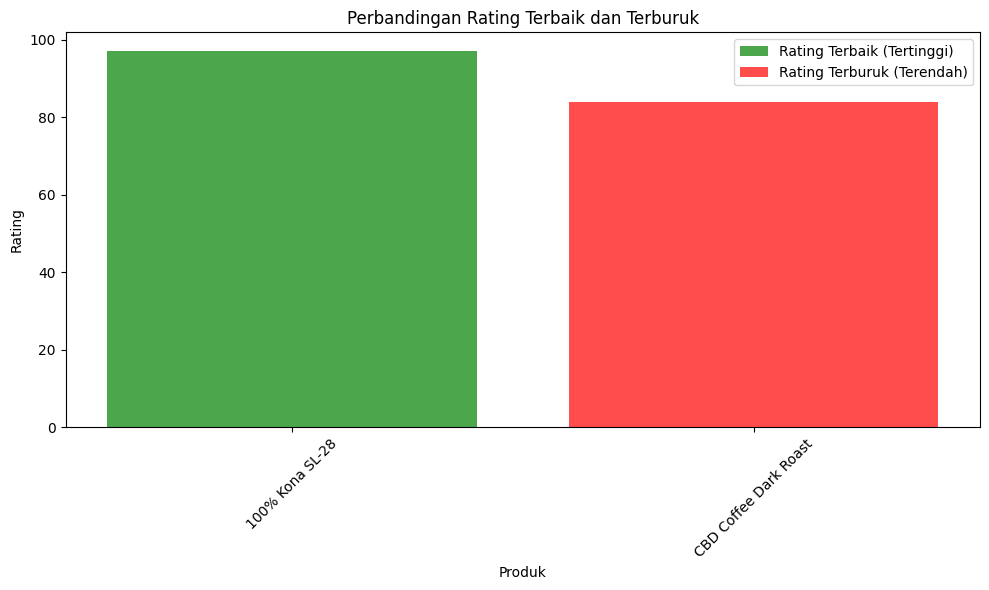

In [6]:
# Data contoh
data = pd.DataFrame({
    'name': ['100% Kona SL-28', 'Ardent Ethiopia Natural', 'CBD Coffee Dark Roast',
             'El Pintado Classico', 'Las Moritas Yellow Caturra', 'Sumatra Dark'],
    'roaster': ['Hula Daddy Kona Coffee', 'JBC Coffee Roasters', 'Rooster Roastery',
                'El Gran Cafe', 'El Gran Cafe', 'Starbucks Coffee'],
    'rating': [97.0, 86.0, 84.0, 87.0, 87.0, 92.0],
    'Jumlah': [1, 1, 1, 1, 1, 1],
    'review_count': [38, 34, 31, 31, 33, 33]
})

# Menentukan rating terbaik dan terburuk
rating_terbaik = data[data['rating'] == data['rating'].max()]
rating_terburuk = data[data['rating'] == data['rating'].min()]

# Membuat grafik
fig, ax = plt.subplots(figsize=(10, 6))

# Membuat bar chart untuk rating terbaik dan terburuk
ax.bar(rating_terbaik['name'], rating_terbaik['rating'], color='green', label='Rating Terbaik (Tertinggi)', alpha=0.7)
ax.bar(rating_terburuk['name'], rating_terburuk['rating'], color='red', label='Rating Terburuk (Terendah)', alpha=0.7)

# Memberikan label dan judul
ax.set_xlabel('Produk')
ax.set_ylabel('Rating')
ax.set_title('Perbandingan Rating Terbaik dan Terburuk')
ax.legend()

# Menampilkan grafik
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


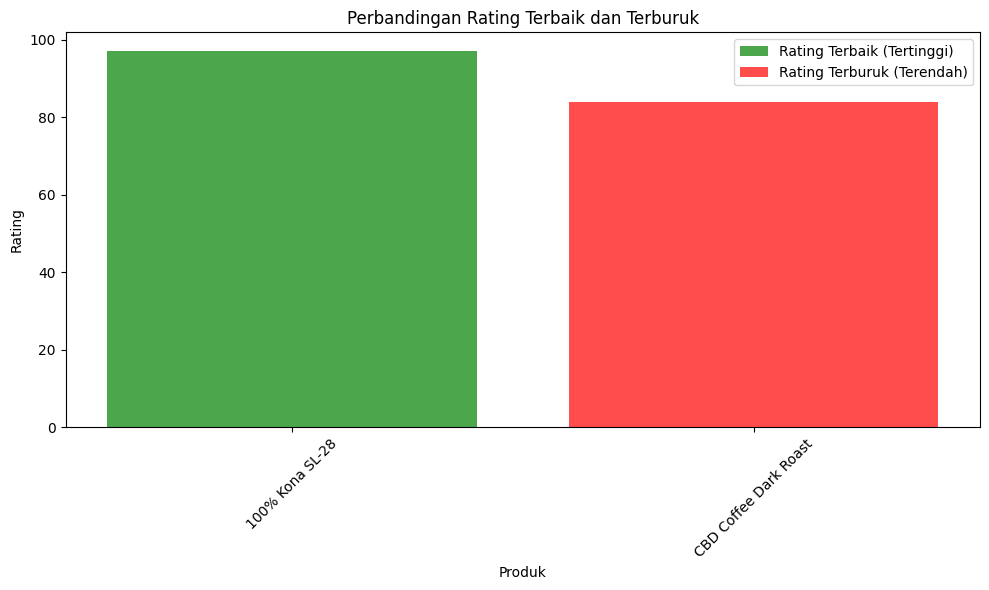

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Data contoh
data = pd.DataFrame({
    'name': ['100% Kona SL-28', 'Ardent Ethiopia Natural', 'CBD Coffee Dark Roast',
             'El Pintado Classico', 'Las Moritas Yellow Caturra', 'Sumatra Dark'],
    'roaster': ['Hula Daddy Kona Coffee', 'JBC Coffee Roasters', 'Rooster Roastery',
                'El Gran Cafe', 'El Gran Cafe', 'Starbucks Coffee'],
    'rating': [97.0, 86.0, 84.0, 87.0, 87.0, 92.0],
    'Jumlah': [1, 1, 1, 1, 1, 1],
    'review_count': [38, 34, 31, 31, 33, 33]
})

# Menentukan rating terbaik dan terburuk
rating_terbaik = data[data['rating'] == data['rating'].max()]
rating_terburuk = data[data['rating'] == data['rating'].min()]

# Membuat grafik bar chart vertikal
fig, ax = plt.subplots(figsize=(10, 6))

# Membuat bar chart vertikal untuk rating terbaik dan terburuk
ax.bar(rating_terbaik['name'], rating_terbaik['rating'], color='green', label='Rating Terbaik (Tertinggi)', alpha=0.7)
ax.bar(rating_terburuk['name'], rating_terburuk['rating'], color='red', label='Rating Terburuk (Terendah)', alpha=0.7)

# Memberikan label dan judul
ax.set_xlabel('Produk')
ax.set_ylabel('Rating')
ax.set_title('Perbandingan Rating Terbaik dan Terburuk')
ax.legend()

# Menampilkan grafik
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


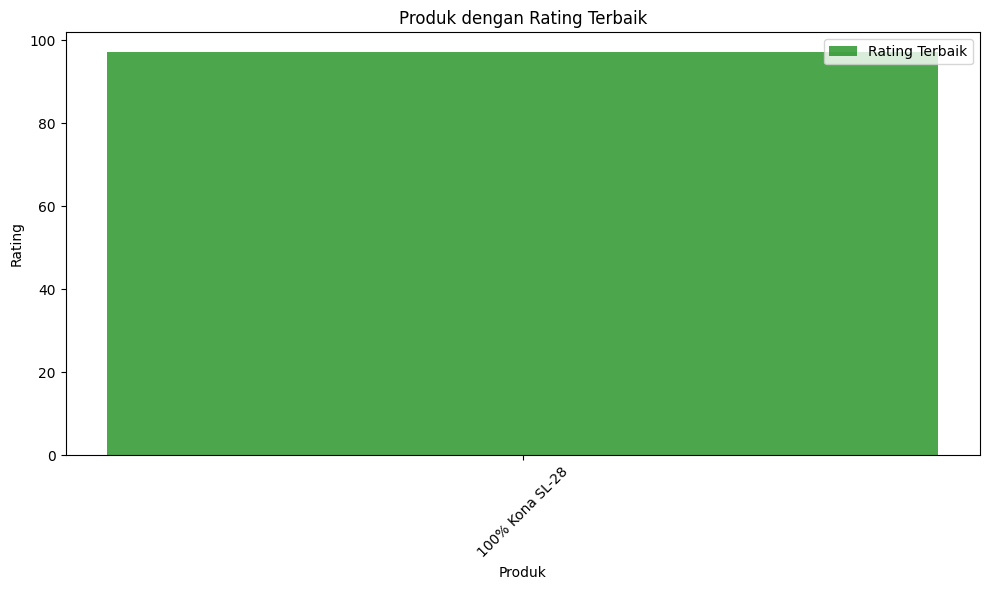

In [9]:
# Data contoh
data = pd.DataFrame({
    'name': ['100% Kona SL-28', 'Ardent Ethiopia Natural', 'CBD Coffee Dark Roast',
             'El Pintado Classico', 'Las Moritas Yellow Caturra', 'Sumatra Dark'],
    'roaster': ['Hula Daddy Kona Coffee', 'JBC Coffee Roasters', 'Rooster Roastery',
                'El Gran Cafe', 'El Gran Cafe', 'Starbucks Coffee'],
    'rating': [97.0, 86.0, 84.0, 87.0, 87.0, 92.0],
    'Jumlah': [1, 1, 1, 1, 1, 1],
    'review_count': [38, 34, 31, 31, 33, 33]
})

# Menemukan produk dengan rating tertinggi
rating_terbaik = data[data['rating'] == data['rating'].max()]

# Membuat grafik bar chart vertikal untuk produk dengan rating terbaik
fig, ax = plt.subplots(figsize=(10, 6))

# Membuat bar chart untuk rating terbaik
ax.bar(rating_terbaik['name'], rating_terbaik['rating'], color='green', label='Rating Terbaik', alpha=0.7)

# Memberikan label dan judul
ax.set_xlabel('Produk')
ax.set_ylabel('Rating')
ax.set_title('Produk dengan Rating Terbaik')
ax.legend()

# Menampilkan grafik
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


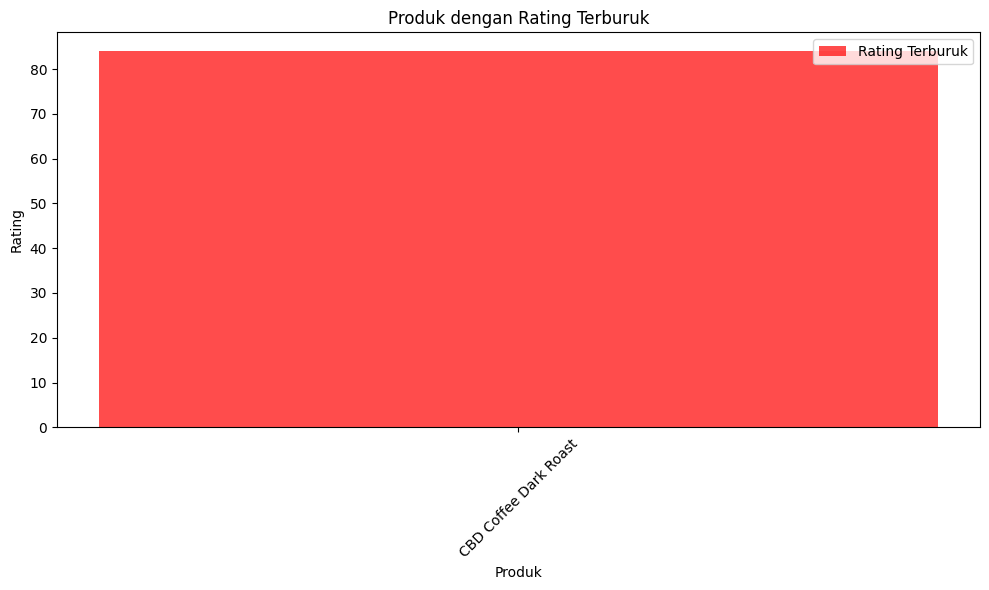

In [11]:


# Menemukan produk dengan rating terendah
rating_terburuk = data[data['rating'] == data['rating'].min()]

# Membuat grafik bar chart vertikal untuk produk dengan rating terburuk
fig, ax = plt.subplots(figsize=(10, 6))

# Membuat bar chart untuk rating terburuk
ax.bar(rating_terburuk['name'], rating_terburuk['rating'], color='red', label='Rating Terburuk', alpha=0.7)

# Memberikan label dan judul
ax.set_xlabel('Produk')
ax.set_ylabel('Rating')
ax.set_title('Produk dengan Rating Terburuk')
ax.legend()

# Menampilkan grafik
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


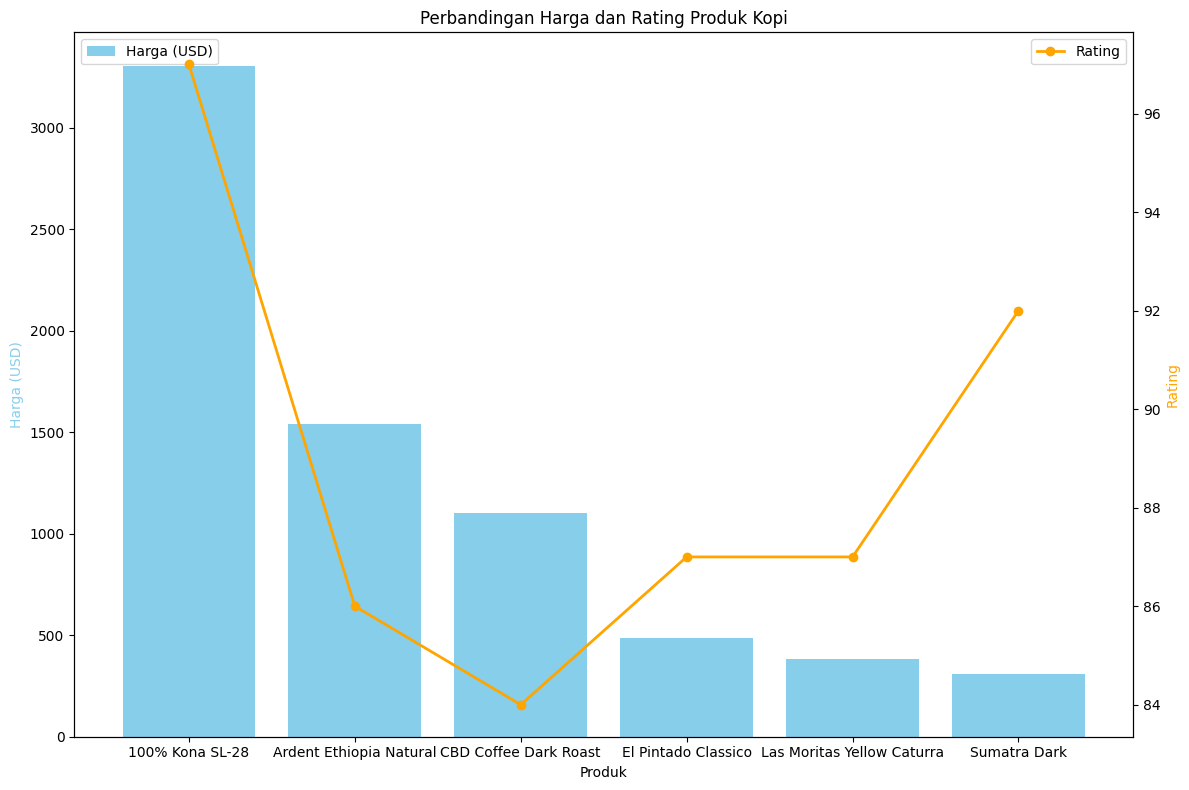

In [13]:
# Data contoh
data = pd.DataFrame({
    'name': ['100% Kona SL-28', 'Ardent Ethiopia Natural', 'CBD Coffee Dark Roast',
             'El Pintado Classico', 'Las Moritas Yellow Caturra', 'Sumatra Dark'],
    'roaster': ['Hula Daddy Kona Coffee', 'JBC Coffee Roasters', 'Rooster Roastery',
                'El Gran Cafe', 'El Gran Cafe', 'Starbucks Coffee'],
    '100g_USD': [3305.0, 1543.0, 1102.0, 485.0, 382.0, 308.0],
    'rating': [97.0, 86.0, 84.0, 87.0, 87.0, 92.0],
    'Jumlah': [1, 1, 1, 1, 1, 1],
    'review_count': [38, 34, 31, 31, 33, 33]
})

# Mengurutkan data berdasarkan harga (100g_USD) dari yang terbesar ke terkecil
data_sorted = data.sort_values(by='100g_USD', ascending=False)

# Membuat grafik bar chart untuk harga (100g_USD) dan rating
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart untuk harga (100g_USD)
ax1.bar(data_sorted['name'], data_sorted['100g_USD'], color='skyblue', label='Harga (USD)')

# Menambahkan sumbu kedua untuk rating
ax2 = ax1.twinx()
ax2.plot(data_sorted['name'], data_sorted['rating'], color='orange', marker='o', label='Rating', linestyle='-', linewidth=2)

# Memberikan label dan judul
ax1.set_xlabel('Produk')
ax1.set_ylabel('Harga (USD)', color='skyblue')
ax2.set_ylabel('Rating', color='orange')
ax1.set_title('Perbandingan Harga dan Rating Produk Kopi')

# Menambahkan legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Menampilkan grafik
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
